In [2]:
import warnings
from plot_metric.functions import BinaryClassification
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
from sklearn.model_selection import GridSearchCV, train_test_split
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, recall_score,precision_score, confusion_matrix,classification_report,accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import csv

In [3]:
data= pd.read_csv('data.csv')


### split data en X et Y

In [4]:
data1= data.copy()
X= data1.drop('cluster', axis=1)
Y= data1['cluster']

In [5]:
X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 123)


In [6]:
np.unique(Y_train, return_counts=True)

(array([0., 1., 2., 3., 4., 5.]),
 array([ 750, 1194, 1196, 1261,  991,  445], dtype=int64))

### ---KNN---

In [43]:
knn = KNeighborsClassifier()
params={'n_neighbors' : [9, 10, 11, 12, 13, 14, 15],
        'metric': ['minkowski','euclidean','manhattan']}

##accuracy
grid_search_acc= GridSearchCV(estimator=knn, param_grid= params, scoring='accuracy',cv=5, n_jobs=-1)
grid_search_acc= grid_search_acc.fit(X_train, Y_train)
y_predict= grid_search_acc.best_estimator_.predict(X_test)

In [44]:
## evaluating the model
print("----------")
print('best parameters: ', grid_search_acc.best_params_)
print("----------")
print(confusion_matrix(Y_test,y_predict))
print("----------")
print(classification_report(Y_test, y_predict))
print("----------")


##ROC
y_predict_proba = grid_search_acc.best_estimator_.predict_proba(X_test)[:,1]

# Visualisation with plot_metric
bc = BinaryClassification(Y_test, y_predict_proba, labels=[1, 0])
# Figures
plt.figure(figsize=(7,6))
bc.plot_roc_curve()
plt.title('ROC curve')
plt.show()

----------
best parameters:  {'metric': 'minkowski', 'n_neighbors': 13}
----------
[[ 39 105  80  87  47   5]
 [ 56 131 112 129  44   8]
 [ 38 166 115  85  51   4]
 [ 58 163 128 122  60   8]
 [ 63 150  97 114  46   9]
 [ 19  55  39  46  19   4]]
----------
              precision    recall  f1-score   support

         0.0       0.14      0.11      0.12       363
         1.0       0.17      0.27      0.21       480
         2.0       0.20      0.25      0.22       459
         3.0       0.21      0.23      0.22       539
         4.0       0.17      0.10      0.12       479
         5.0       0.11      0.02      0.04       182

    accuracy                           0.18      2502
   macro avg       0.17      0.16      0.16      2502
weighted avg       0.18      0.18      0.17      2502

----------


ValueError: multiclass format is not supported

<Figure size 504x432 with 0 Axes>

In [45]:
## Recall
rec_avg=make_scorer(recall_score, average='macro')
grid_search_rec= GridSearchCV(estimator=knn, param_grid= params, scoring=rec_avg,cv=5, n_jobs=-1)
grid_search_rec= grid_search_rec.fit(X_train, Y_train)
y_predict= grid_search_rec.best_estimator_.predict(X_test)

In [46]:
## evaluating the model
print("----------")
print('best parameters: ', grid_search_rec.best_params_)
print("----------")
print(confusion_matrix(Y_test,y_predict))
print("----------")
print(classification_report(Y_test, y_predict))
print("----------")

----------
best parameters:  {'metric': 'minkowski', 'n_neighbors': 13}
----------
[[ 39 105  80  87  47   5]
 [ 56 131 112 129  44   8]
 [ 38 166 115  85  51   4]
 [ 58 163 128 122  60   8]
 [ 63 150  97 114  46   9]
 [ 19  55  39  46  19   4]]
----------
              precision    recall  f1-score   support

         0.0       0.14      0.11      0.12       363
         1.0       0.17      0.27      0.21       480
         2.0       0.20      0.25      0.22       459
         3.0       0.21      0.23      0.22       539
         4.0       0.17      0.10      0.12       479
         5.0       0.11      0.02      0.04       182

    accuracy                           0.18      2502
   macro avg       0.17      0.16      0.16      2502
weighted avg       0.18      0.18      0.17      2502

----------


In [47]:
## precision
prec_avg=make_scorer(precision_score, average='macro')
grid_search_prec_avg= GridSearchCV(estimator=knn, param_grid= params, scoring=prec_avg,cv=5, n_jobs=-1)
grid_search_prec_avg= grid_search_prec_avg.fit(X_train, Y_train)
y_predict= grid_search_prec_avg.best_estimator_.predict(X_test)

In [48]:
## evaluating the model
print("----------")
print('best parameters: ', grid_search_prec_avg.best_params_)
print("----------")
print(confusion_matrix(Y_test,y_predict))
print("----------")
print(classification_report(Y_test, y_predict))
print("----------")

----------
best parameters:  {'metric': 'minkowski', 'n_neighbors': 13}
----------
[[ 39 105  80  87  47   5]
 [ 56 131 112 129  44   8]
 [ 38 166 115  85  51   4]
 [ 58 163 128 122  60   8]
 [ 63 150  97 114  46   9]
 [ 19  55  39  46  19   4]]
----------
              precision    recall  f1-score   support

         0.0       0.14      0.11      0.12       363
         1.0       0.17      0.27      0.21       480
         2.0       0.20      0.25      0.22       459
         3.0       0.21      0.23      0.22       539
         4.0       0.17      0.10      0.12       479
         5.0       0.11      0.02      0.04       182

    accuracy                           0.18      2502
   macro avg       0.17      0.16      0.16      2502
weighted avg       0.18      0.18      0.17      2502

----------


In [49]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2, titre):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        #ax.set_ylim([0.74,0.83])
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title(titre, fontsize=18, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=14)
    ax.set_ylabel(titre+'[CV Avg Score]', fontsize=14)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

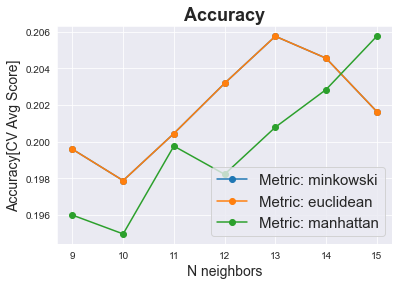

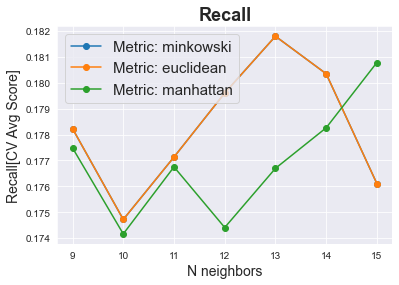

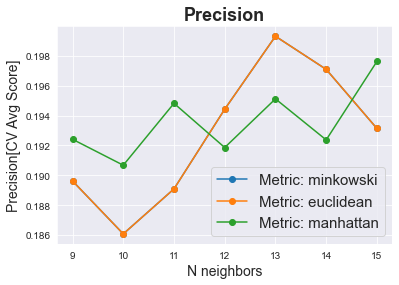

In [50]:
# Calling Method 
plot_grid_search(grid_search_acc.cv_results_, params['n_neighbors'], params['metric'], 'N neighbors', 'Metric', 'Accuracy')
plot_grid_search(grid_search_rec.cv_results_, params['n_neighbors'], params['metric'], 'N neighbors', 'Metric', 'Recall')
plot_grid_search(grid_search_prec_avg.cv_results_, params['n_neighbors'], params['metric'], 'N neighbors', 'Metric', 'Precision')


In [51]:
def return_index_list(param1, param2):
    list=[]
    for p1 in param1:
        for p2 in param2:
            list.append('['+str(p1)+', '+str(p2)+']')
    return list
index= return_index_list(params['metric'], params['n_neighbors'])

In [52]:
df= pd.DataFrame({  'Accuracy': grid_search_acc.cv_results_['mean_test_score'],
                    'Precision(Avg)': grid_search_prec_avg.cv_results_['mean_test_score'],
                    'Recall(Avg)': grid_search_rec.cv_results_['mean_test_score'],
                     'std_cross_validation': grid_search_acc.cv_results_['std_test_score']},
                 index=index)

## to excel
writer = pd.ExcelWriter('KNN.xlsx')
df.to_excel(writer, 'KNN')
writer.save()
writer.close()

In [53]:
df

,Accuracy,Precision(Avg),Recall(Avg),std_cross_validation
"[minkowski, 9]",0.199589,0.189626,0.178230,0.007488
"[minkowski, 10]",0.197876,0.186082,0.174721,0.011414
"[minkowski, 11]",0.200445,0.189095,0.177133,0.009632
"[minkowski, 12]",0.203187,0.194431,0.179605,0.009581
"[minkowski, 13]",0.205756,0.199313,0.181799,0.006097
"[minkowski, 14]",0.204557,0.197096,0.180349,0.010530
"[minkowski, 15]",0.201645,0.193141,0.176105,0.004917
"[euclidean, 9]",0.199589,0.189626,0.178230,0.007488
"[euclidean, 10]",0.197876,0.186082,0.174721,0.011414
"[euclidean, 11]",0.200445,0.189095,0.177133,0.009632


In [ ]:
grid_search_acc.cv_results_